# Machine Learning with XGboost in Python


## 1. Frame the problem and look at the big picture

The dataset was downloaded on [Kaggle](https://www.kaggle.com/jessemostipak/hotel-booking-demand/). The data is originally from an article called [Hotel booking demand datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191) by Nuno Antonio, Ana de Almeida, and Luis Nunes. It was then cleaned by Thomas Mock and Antoine Bichat for [#TidyTuesday during the week of February 11th, 2020](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md). For the purposes of this code-along, it was further pre-processed to have cleaner ready-to-use features (e.g., dropping irrelevant columns, one-hot-encoding). The dataset has the following [license](https://creativecommons.org/licenses/by/4.0/).


### Data Dictionary

It contains the **53 columns**:

_For binary variables: `1` = true and `0` = false._

#### **Target**
- `is_canceled`: Binary variable indicating whether a booking was canceled

#### **Features**
- `lead time`: Number of days between booking date and arrival date
- `arrival_date_week_number`, `arrival_date_day_of_month`, `arrival_date_month`: Week number, day date, and month number of arrival date
- `stays_in_weekend_nights`, `stays_in_week_nights`: Number of weekend nights (Saturday and Sunday) and weeknights (Monday to Friday) the customer booked
- `adults`,`children`,`babies`: Number of adults, children, babies booked for the stay
- `is_repeated_guest`: Binary variable indicating whether the customer was a repeat guest
- `previous_cancellations`: Number of prior bookings that were canceled by the customer
- `previous_bookings_not_canceled`: Number of prior bookings that were not canceled by the customer
- `required_car_parking_spaces`: Number of parking spaces requested by the customer
- `total_of_special_requests`: Number of special requests made by the customer
- `avg_daily_rate`: Average daily rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights
- `booked_by_company`: Binary variable indicating whether a company booked the booking
- `booked_by_agent`: Binary variable indicating whether an agent booked the booking
- `hotel_City`: Binary variable indicating whether the booked hotel is a "City Hotel"
- `hotel_Resort`: Binary variable indicating whether the booked hotel is a "Resort Hotel"
- `meal_BB`: Binary variable indicating whether a bed & breakfast meal was booked
- `meal_HB`: Binary variable indicating whether a half board meal was booked
- `meal_FB`: Binary variable indicating whether a full board meal was booked
- `meal_No_meal`: Binary variable indicating whether there was no meal package booked
- `market_segment_Aviation`, `market_segment_Complementary`, `market_segment_Corporate`, `market_segment_Direct`, `market_segment_Groups`, `market_segment_Offline_TA_TO`, `market_segment_Online_TA`, `market_segment_Undefined`: Indicates market segment designation with a value of `1`. "TA"= travel agent, "TO"= tour operators
- `distribution_channel_Corporate`, `distribution_channel_Direct`, `distribution_channel_GDS`, `distribution_channel_TA_TO`, `distribution_channel_Undefined`: Indicates booking distribution channel with a value of `1`. "TA"= travel agent, "TO"= tour operators, "GDS" = Global Distribution System
- `reserved_room_type_A`,`reserved_room_type_B`, `reserved_room_type_C`,`reserved_room_type_D`, `reserved_room_type_E`, `reserved_room_type_F`, `reserved_room_type_G`, `reserved_room_type_H`, `reserved_room_type_L`: Indicates code of room type reserved with a value of `1`. Code is presented instead of designation for anonymity reasons
- `deposit_type_No_Deposit`: Binary variable indicating whether a deposit was made
- `deposit_type_Non_Refund`: Binary variable indicating whether a deposit was made in the value of the total stay cost
- `deposit_type_Refundable`: Binary variable indicating whether a deposit was made with a value under the total stay cost
- `customer_type_Contract`: Binary variable indicating whether the booking has an allotment or other type of contract associated to it
- `customer_type_Group`: Binary variable indicating whether the booking is associated to a group
- `customer_type_Transient`: Binary variable indicating whether the booking is not part of a group or contract, and is not associated to other transient booking
- `customer_type_Transient-Party`: Binary variable indicating whether the booking is transient, but is associated to at least another transient booking



## 2. Get the data

In [1]:
# Import libraries
import pandas as pd
import xgboost as xgb # XGBoost typically uses the alias "xgb"
import numpy as np


#Nota: Il dataset è già stato pulito e per le categoriche é stato fatto ad esempio un one-hot encoding


In [2]:
from pathlib import Path
import urllib.request

def load_bookings_data():
  file_path=Path("datasets/hotel_bookings_clean.csv")
  if not file_path.exists():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    dropbox_url = "https://www.dropbox.com/scl/fi/bs9o7emzrzft8sr5vk05z/hotel_bookings_clean.csv?rlkey=26wa1kul3qyg13e9vrbetnngt&st=n7psl9dt&dl=1"
    urllib.request.urlretrieve(dropbox_url, file_path)
  return pd.read_csv(file_path)

# Read in the dataset
bookings = load_bookings_data()

In [3]:
# Display the first 5 rows
bookings.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,1,7,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,27,1,7,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,27,1,7,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,27,1,7,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,27,1,7,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,1,0


In [4]:
# List out our columns
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   arrival_date_month              119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119206 non-null  float64
 9   babies                          119210 non-null  int64  
 10  is_repeated_guest               119210 non-null  int64  
 11  previous_cancellations          119210 non-null  int64  
 12  previous_booking

In [5]:
# Take a closer look at column distributions
bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119206.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,27.163376,15.798717,6.552051,0.927053,2.499195,1.859206,0.104047,0.007961,...,0.017549,0.005042,0.000050,0.876277,0.122364,0.001359,0.034158,0.004815,0.750575,0.210452
std,0.483012,106.875450,13.601107,8.781070,3.089796,0.995117,1.897106,0.575186,0.398842,0.097509,...,0.131305,0.070825,0.007094,0.329266,0.327707,0.036839,0.181636,0.069223,0.432682,0.407631
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,7.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,161.000000,38.000000,23.000000,9.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,53.000000,31.000000,12.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Compute the number of not cancelled and cancelled
bookings['is_canceled'].value_counts()  #DEVO VERIFICARE CHE LA VARIABILE TARGET SIA BEN BILANCIATA
                                        #ALTRIMENTI XGBOOST NON VA BENE
                                        #QUESTO E' ABBASTANZA BILANCIATO

,count
is_canceled,
0,75011
1,44199


### 2.1 Create a Test Set

In [10]:
# Create a Test Set

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bookings, test_size=0.2, random_state=123) #SPLITTO SUBITO
                                                                                  #SEED FISSO COSI' IN CLASSE TUTTI ABBIAMO UNO SPLIT SIMILE
                                                                                  #NOI POSSIAMO UTILIZZARNE UNO CASUALE

## 3. Explore the data to gain insights

In [11]:
# Create a copy of the data for exploration

booking_explore = train_set.copy()

In [12]:
# Look for correlations
corr_matrix = booking_explore.corr()
corr_matrix['is_canceled'].sort_values(ascending=False)


,is_canceled
is_canceled,1.000000
deposit_type_Non_Refund,0.482240
lead_time,0.292932
market_segment_Groups,0.224303
distribution_channel_TA_TO,0.173829
hotel_City,0.137369
customer_type_Transient,0.133222
previous_cancellations,0.109923
booked_by_agent,0.101846
reserved_room_type_A,0.070416


## 4. Prepare the data
We skip this part because for the purpose of this lecture, the dataset was pre-processed to have cleaner ready-to-use features (e.g., dropping irrelevant columns, one-hot-encoding).

In [13]:
# Define X and y train data

X_train = train_set.drop("is_canceled", axis=1)
y_train = train_set["is_canceled"].copy()

## 5. Explore the model

### Simple evaluation

In [15]:
# Instantiate a XGBClassifier

#xgb_clf = xgb.XGBClassifier(random_state=123)  #Usando questo, e poi mostrando i parametri non l'interfaccia non li mostra ma in realtà ci sono

xgb_clf = xgb.XGBClassifier(
    base_score=0.5, booster='gbtree', colsample_bylevel=1,
    colsample_bynode=1, colsample_bytree=1, gamma=0,
    importance_type='gain', interaction_constraints='',
    learning_rate=0.1, max_delta_step=0, max_depth=6,
    min_child_weight=1, monotone_constraints='()',
    n_estimators=100, n_jobs=1, num_parallel_tree=1,
    objective='binary:logistic', random_state=123, reg_alpha=0,
    reg_lambda=1, scale_pos_weight=1, subsample=1, verbosity=1
)

# qui i parametri li mette a mano e così poi si vedono

# Inspect the parameters
xgb_clf.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'device': None,
 'eval_metric': None,
 'gamma': 0,
 'grow_policy': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': None,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'multi_strategy': None,
 'n_jobs': 1,
 'num_parallel_tree': 1,
 'random_state': 123,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': 1}

In [16]:
## Set n_estimators to 10
xgb_clf.set_params(n_estimators=10)

## Set max_depth to 3
xgb_clf.set_params(max_depth=3)

# Set the evaluation metric to error
xgb_clf.set_params(eval_metric='error')

# Fit it to the training set
xgb_clf.fit(X_train, y_train)

xgb_clf.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'device': None,
 'eval_metric': 'error',
 'gamma': 0,
 'grow_policy': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': 0,
 'max_depth': 3,
 'max_leaves': None,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'multi_strategy': None,
 'n_jobs': 1,
 'num_parallel_tree': 1,
 'random_state': 123,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': 1}

In [17]:
X_test = test_set.drop("is_canceled", axis=1) #tipo housing e housing_labels
y_test= test_set["is_canceled"].copy()

In [18]:
# Predict the labels of the test set
preds = xgb_clf.predict(X_test)       #LO HA FATTO SOLO PER MOSTRARCI UN RISULTATO, NON SI FA COSì

In [19]:
# Calculate the accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

# Print the baseline accuracy
print("Baseline accuracy:", accuracy)

Baseline accuracy: 0.7654559181276739


### Plotting feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

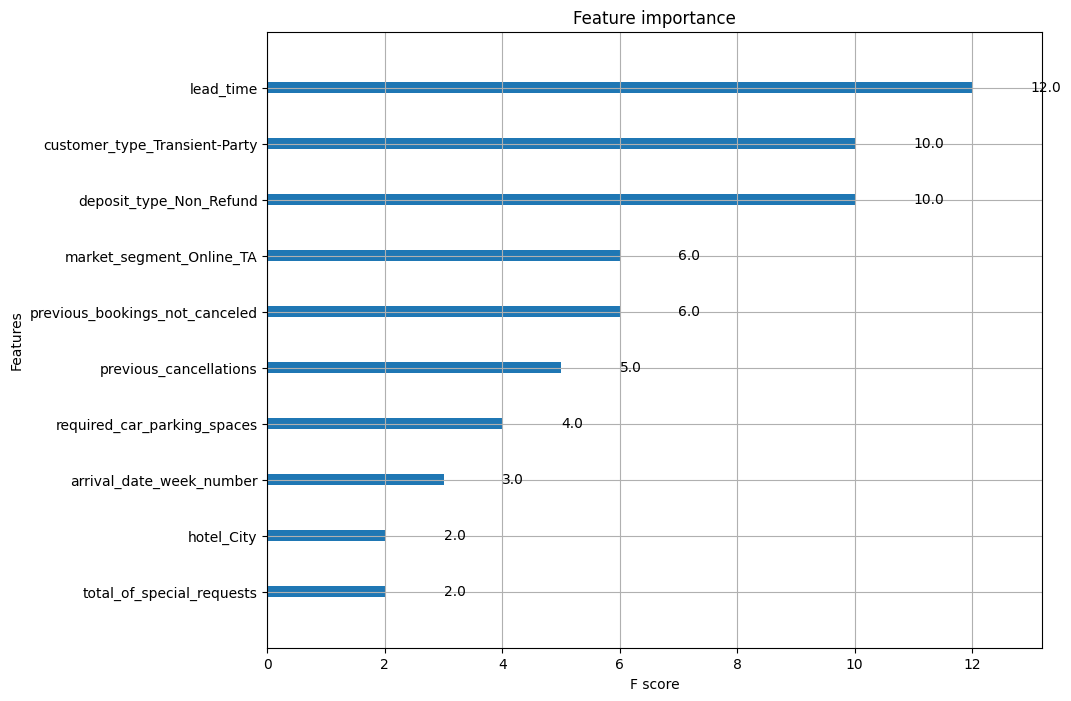

In [20]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8)

# Plot feature importance
xgb.plot_importance(xgb_clf) #Ho 10 alberi, lead time compare 12 quindi in un paio di alberi compare 2 volte e gli altri 8 una forse,
                             # anche perché è un float quindi facile che compara più volte

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

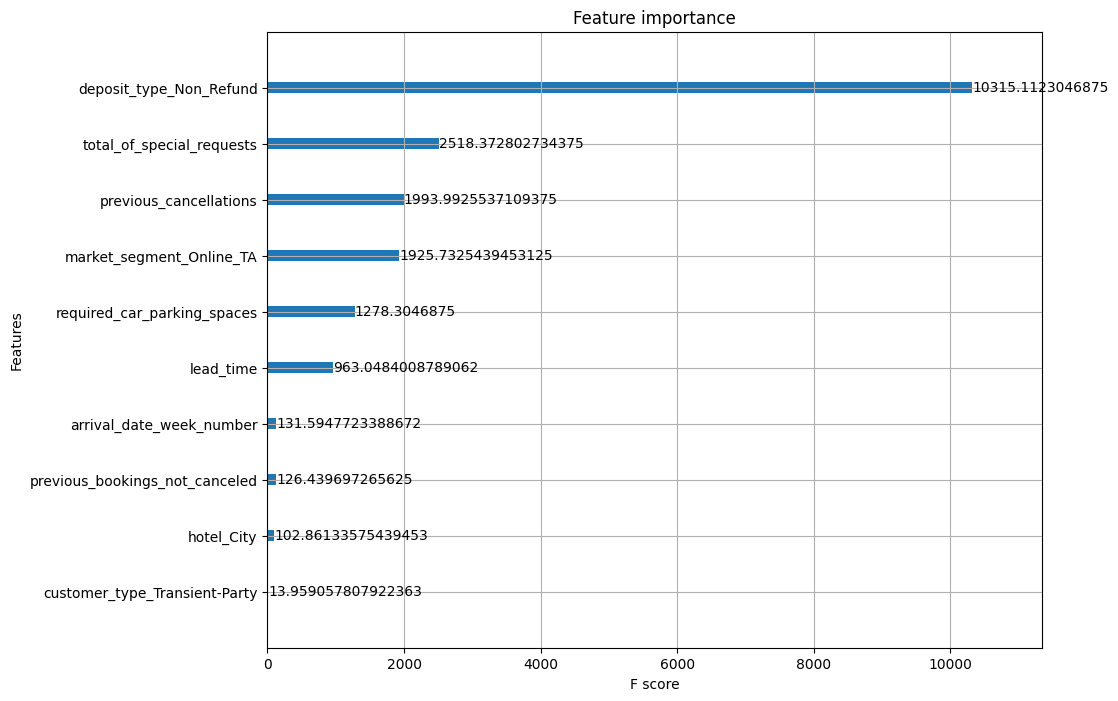

In [21]:
# Plot gain instead of weight
xgb.plot_importance(xgb_clf, importance_type="gain") # GAIN -> GUADAGNO INFORMATIVO
                                                     # più divido bene i dati più aumenta il guadagno informativo. Con valori numeri, sono continui, quindi è facile che sia molte alto. Si
                                                     # deposit_type_Non_refund ha senso che sia alto perché se sa che un cliente viene non chiede indietro la caparra
                                                     # Anche questa utile per capire il problema

### Plotting a decision tree from your model

<Axes: >

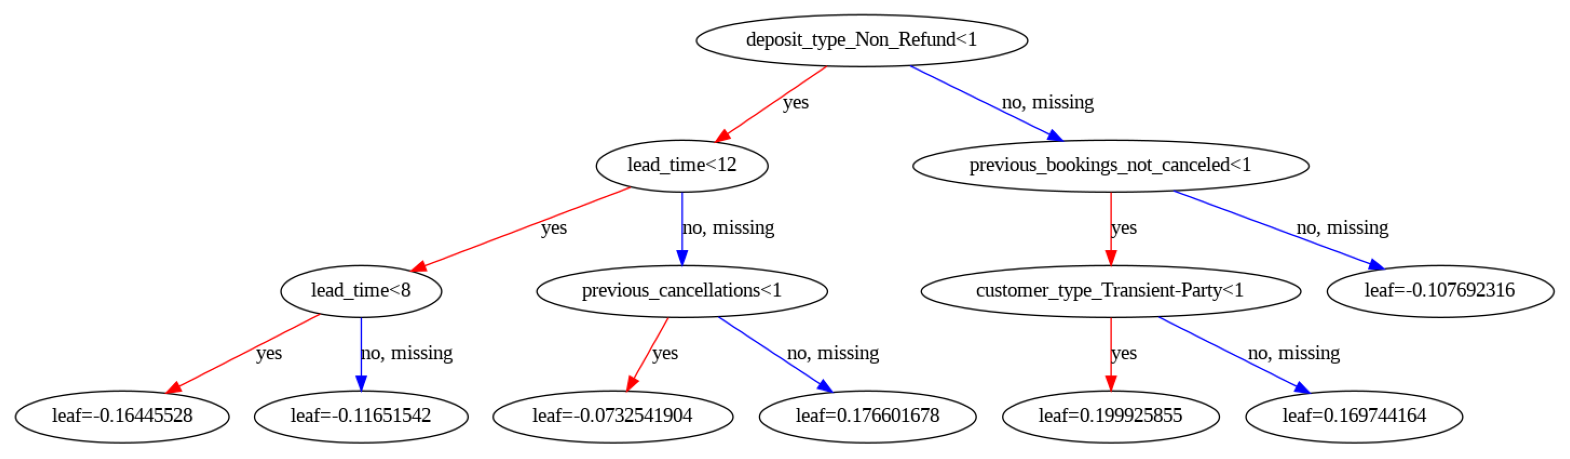

In [22]:
matplotlib.rcParams['figure.figsize'] = (20.0, 8)

# Plot the first tree
xgb.plot_tree(xgb_clf, num_trees=0) # vedo la presenza di 2 lead_time

<Axes: >

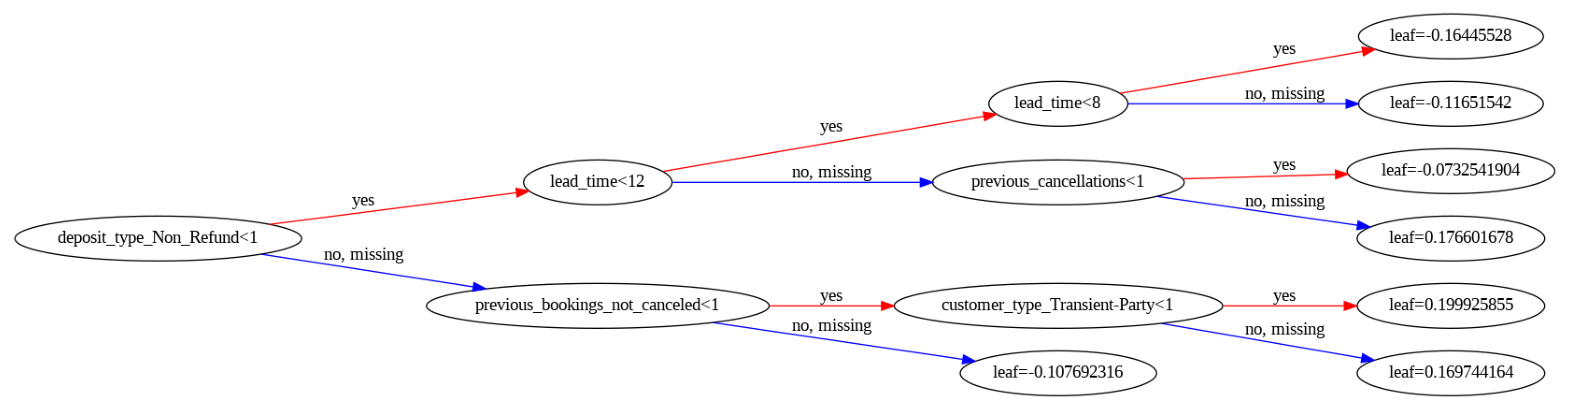

In [23]:
# Plot the last tree
xgb.plot_tree(xgb_clf, num_trees=0, rankdir='LR')

### Cross Validation in XGBoost

In [26]:
from sklearn.model_selection import cross_val_score

# Instantiate the XGBClassifier with 25 boosting rounds and error evaluation metric
xgb_clf = xgb.XGBClassifier(n_estimators=10, eval_metric='error', random_state=123)

# Perform 5-fold cross-validation
scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy') #cv = 5 -> 4/5 dei dati sono di training e 1/5 di validation

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean cross-validation score:", scores.mean()) #81.5 % delle volte si capisce se una persona va o cancella
print("Standard deviation of cross-validation scores:", scores.std()) #E' bassa quindi vuol dire che ho abbastanza dati



Cross-validation scores: [0.81314879 0.816242   0.81346335 0.81974519 0.81256226]
Mean cross-validation score: 0.8150323194657683
Standard deviation of cross-validation scores: 0.0026752575608608112


## 6. Fine Tune Your Model

In [27]:
from sklearn.metrics import accuracy_score

# ho capito che il modello XGBoost va bene quindi ora provo a miglioralo

# Instantiate the XGBClassifier with 25 boosting rounds and error evaluation metric
xgb_clf = xgb.XGBClassifier(n_estimators=25, eval_metric='error', random_state=123) #aumenta il numero di stimatori

### `max_depth`: Tree Complexity Control

In [32]:
# Set max_depth to 10
xgb_clf.set_params(max_depth=10)    # 10 profondità degli alberi

# Fit the classifier to the training set
scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean cross-validation score:", scores.mean())    #la deviazione stardard aumenta leggermente, magari si può provare di aumentare. è sensibile
print("Standard deviation of cross-validation scores:", scores.std())


Cross-validation scores: [0.83406732 0.83647898 0.83553528 0.83709956 0.83274786]
Mean cross-validation score: 0.8351858010635242
Standard deviation of cross-validation scores: 0.0015906903945123866


In [33]:
# Predict the labels of the test set
xgb_clf.fit(X_train, y_train)

preds = xgb_clf.predict(X_test)

# Compute the accuracy
accuracy_score(y_test, preds)

0.8380588876772083

### `colsample_bytree`: Feature Subsampling per Tree

In [35]:
# Set colsample_bytree to 0.5
xgb_clf.set_params(colsample_bytree=0.5)  # QUANDO CREO UN NUOVO ALBERO (NUOVO BOOST) PERNDO SOLO IL 50% DELLE COLONNE, FEATURE
                                          # COSì CATTURO IL CONTRIBUTO DELLE FEATURE CHE HANNO MENO IMPORTANZA
                                          # COSì FACCIO UN BOOST (WEAK LEARNER) DELLE FEATURE CHE ALTRIMENTI NON CONTRINBUIREBBERO


# Fit the classifier to the training set
scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy')


# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean cross-validation score:", scores.mean())
print("Standard deviation of cross-validation scores:", scores.std())

Cross-validation scores: [0.83721296 0.83873335 0.83605956 0.84040266 0.83641797]
Mean cross-validation score: 0.837765301673865
Standard deviation of cross-validation scores: 0.0016076530638596033


### `subsample`: Row Subsampling

In [36]:
# Set subsample to 0.75
xgb_clf.set_params(subsample=0.75)  # CAMPIONA LE RIGHE, MOTIVO SIMILE A SOPRA
                                    # QUI NON DA' IMPATTO QUINDI VUOL DIRE CHE IL CONTENUTO INFORMATIVO E' BEN DISTRIBUITO

# Fit the classifier to the training set
scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy')


# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean cross-validation score:", scores.mean())
print("Standard deviation of cross-validation scores:", scores.std())



Cross-validation scores: [0.83453916 0.83873335 0.83396246 0.83888219 0.83453049]
Mean cross-validation score: 0.8361295314320814
Standard deviation of cross-validation scores: 0.0021972446511128252


### `gamma`: Minimum Loss Reduction to Split

In [37]:
# Set gamma to .25
xgb_clf.set_params(gamma=0.25)  # MINIMA RIDUZIONE CHE SI ACCETTA PER ACCETTARE UNO SPLIT


# Fit the classifier to the training set
scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy')


# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean cross-validation score:", scores.mean())
print("Standard deviation of cross-validation scores:", scores.std())

Cross-validation scores: [0.83621684 0.83768481 0.83359547 0.8382006  0.83620825]
Mean cross-validation score: 0.836381193340151
Standard deviation of cross-validation scores: 0.001601674953461835


### `learning_rate`: Step Size Shrinkage

In [38]:
# Set learning rate to .1
xgb_clf.set_params(learning_rate=0.1)   # QUANTO IMPARO RISPETTO AL MODELLO PRECEDENTE
                                        # Alto -> rischio overfitting

# Fit the classifier to the training set
scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy')


# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean cross-validation score:", scores.mean())
print("Standard deviation of cross-validation scores:", scores.std())

Cross-validation scores: [0.82489252 0.82442068 0.82017406 0.82834373 0.82247156]
Mean cross-validation score: 0.8240605097545206
Standard deviation of cross-validation scores: 0.002712829989738944


### Regularization: `reg_alpha` and `reg_lambda`

In [39]:
# set reg_alpha to .1
xgb_clf.set_params(reg_alpha=0.01) # ALPHA, LAMBDA sono regolarizzazoni L1, L2

# Fit the classifier to the training set
scores = cross_val_score(xgb_clf, X_train, y_train, cv=5, scoring='accuracy')


# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean cross-validation score:", scores.mean())
print("Standard deviation of cross-validation scores:", scores.std())

Cross-validation scores: [0.82536437 0.82489252 0.82038377 0.82928747 0.82231427]
Mean cross-validation score: 0.8244484806725456
Standard deviation of cross-validation scores: 0.0030175700612825648


In [40]:
# Print the model parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.5,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'error',
 'feature_types': None,
 'gamma': 0.25,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 25,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': 0.01,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.75,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

### Hyperparameter Tuning with Randomized Search

In [41]:
from sklearn.model_selection import RandomizedSearchCV

# Define a parameter grid
rs_param_grid = {
    # max_depth: values from 3 to 12
    'max_depth': list((range(3,12))),
    # alpha: values 0, .001, .01, .1
    'alpha': [0,0.001, 0.01,0.1,1],
    # subsample: values 0.25,0.5,0.75, 1
    'subsample': [0.5,0.75,1],
    # learning rate: ten values between 0.01 - 0.5
    'learning_rate': np.linspace(0.01,0.5, 10),
    # n_estimators: values 10, 25, 40
    'n_estimators': [10, 25, 40]
    }


# Insantiate XGBoost Clasifier
xgb_clf = xgb.XGBClassifier(eval_metric='error', random_state=123)

# Instantiate RandomizedSearchCV()
xgb_rs = RandomizedSearchCV(estimator=xgb_clf,param_distributions=rs_param_grid,
                                cv=3, n_iter=5, verbose=2, random_state=123)

# Train the model on the training set
xgb_rs.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", xgb_rs.best_params_)
print("Best accuracy found: ", xgb_rs.best_score_)





Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.5s
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.4s
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.6s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   2.3s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.8s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.7s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=8, n_estimators=40, subsample=0.75; total time=   0.9s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=8, n_estimators=40, subsample=0.75; total time=   0.9s
[CV] END

### Evaluate Your System on the Test Set

In [42]:
final_predictions = xgb_rs.predict(X_test)
accuracy_score(y_test, final_predictions)

0.8362972904957637